In [1]:
import numpy as np
import pandas as pd
import os
import sys
import random
import matplotlib.pyplot as plt
import operator
import seaborn as sns
#import matplotlib.patches as patches
%matplotlib inline

In [2]:
# Root directory of the project
#ROOT_DIR = os.path.abspath("../../aimldl-cod/external/Mask_RCNN/samples/ods")
#ROOT = os.path.abspath("../../aimldl-cod/external/Mask_RCNN")

# Import Mask RCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library
#sys.path.append(ROOT)

#from importlib import import_module
#from ods import get_dnncfg
#from ods import ODS
#import core.utils as odsutils

In [3]:
import pymongo

In [11]:
#to connect to remote db pass ip address and port number(if not default i.e. 27017)of remote db to MongoClient() 
from pymongo import MongoClient
client = MongoClient('10.4.71.69')

In [12]:
client.server_info()

{'version': '4.1.13',
 'gitVersion': '441714bc4c70699950f3ac51a5cac41dcd413eaa',
 'modules': [],
 'allocator': 'tcmalloc',
 'javascriptEngine': 'mozjs',
 'sysInfo': 'deprecated',
 'versionArray': [4, 1, 13, 0],
 'openssl': {'running': 'OpenSSL 1.1.1  11 Sep 2018',
  'compiled': 'OpenSSL 1.1.0g  2 Nov 2017'},
 'buildEnvironment': {'distmod': 'ubuntu1804',
  'distarch': 'x86_64',
  'cc': '/opt/mongodbtoolchain/v3/bin/gcc: gcc (GCC) 8.2.0',
  'ccflags': '-fno-omit-frame-pointer -fno-strict-aliasing -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-const-variable -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -fno-builtin-memcmp',
  'cxx': '/opt/mongodbtoolchain/v3/bin/g++: g++ (GCC) 8.2.0',
  'cxxflags': '-Woverloaded-virtual -Wno-maybe-uninitialized -fsized-deallocation -std=c++17',
  'linkflags': '-pthread -Wl,-z,now -rdynamic -Wl,--fatal-w

In [13]:
db = client.annon

In [17]:
db.list_collection_names()

['IMAGES',
 'ANNOTATIONS',
 'AIDS',
 'STATS',
 'LOG',
 'RELEASE',
 'ERRORS',
 'CLASSINFO',
 'IMAGELIST',
 'MODELINFO']

In [18]:
collection = db.STATS

In [19]:
ten = collection.find()
entr = list(ten)
print(entr)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
df = pd.DataFrame(entr)
df

,_id,rel_filename,annotation_per_label,annotation_rel_date,annotation_tool,annotator_id,created_on,image_name,image_part,image_per_label,...,modified_on,total_ant,total_ant_type,total_error_ant,total_error_empty_ant,total_error_img_notfound,total_error_img_reading,total_error_unlabeled_ant,total_img,total_lbl
0,5d8a0afb6e739a0444a85838,images-p4-310519_AT2_via205_310519.json,"[52, 25, 26, 2, 4]",310519,via205,AT2,2019-09-24 17:54:27 +05:30,"[[271218_122102_16716_zed_l_183.jpg, 271218_12...",images-p4,"[27, 14, 26, 2, 4]",...,None,109,"[{'polygon': 103, 'rect': 6}]",0,0,0,0,0,27,5
1,5d8a0b116e739a0444a859b7,images-p1-030419_AT3_via205_040419.json,"[226, 70]",040419,via205,AT3,2019-09-24 17:54:49 +05:30,"[[291018_144257_16716_zed_l_076.jpg, 291018_14...",images-p1,"[70, 70]",...,None,296,[{'polygon': 296}],0,0,0,0,0,70,2
2,5d8a0b1d6e739a0444a85d34,images-p3-250219_AT3_via205_080319.json,"[294, 6, 83, 110, 257, 30, 51, 2, 7]",080319,via205,AT3,2019-09-24 17:55:01 +05:30,"[[291018_143933_16718_zed_l_054.jpg, 291018_14...",images-p3,"[65, 6, 83, 82, 89, 30, 50, 2, 7]",...,None,840,"[{'polygon': 821, 'rect': 19}]",0,0,0,0,0,107,9
3,5d8a0b2d6e739a0444a86592,images-p2-050219_AT3_via205_050219.json,"[339, 287, 6, 26, 76, 61, 75, 43, 5]",050219,via205,AT3,2019-09-24 17:55:17 +05:30,"[[291018_105116_16716_zed_l_113.jpg, 291018_10...",images-p2,"[140, 140, 6, 26, 76, 33, 53, 28, 5]",...,None,918,"[{'polygon': 903, 'rect': 15}]",0,0,0,0,0,149,9
4,5d8a0b316e739a0444a86f2c,images-p1-120619_AT5_via205_280619.json,[53],280619,via205,AT5,2019-09-24 17:55:21 +05:30,"[[311218_105959_16718_zed_l_518.jpg, 311218_11...",images-p1,[53],...,None,53,[{'polygon': 53}],0,0,0,0,0,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,5d8a1ce96e739a0444b0ee61,images-p2-050219_AT3_via205_180219.json,"[185, 262, 102, 36, 158, 147, 54, 48, 14, 3, 14]",180219,via205,AT3,2019-09-24 19:10:57 +05:30,"[[291018_110138_16717_zed_l_080.jpg, 291018_11...",images-p2,"[78, 78, 58, 35, 76, 67, 48, 32, 14, 3, 10]",...,None,1023,"[{'polygon': 661, 'rect': 362}]",0,0,0,0,0,82,11
375,5d8a1cfe6e739a0444b0f7c6,images-p1-230119_AT3_via205_010219.json,"[345, 156, 132, 272, 12, 77, 8, 11, 17, 19, 5,...",010219,via205,AT3,2019-09-24 19:11:18 +05:30,"[[211118_164158_16716_zed_l_113.jpg, 211118_16...",images-p1,"[126, 98, 87, 149, 11, 33, 5, 7, 15, 19, 5, 18...",...,None,1080,"[{'polygon': 1041, 'rect': 39}]",0,0,0,0,0,198,14
376,5d8a1d0e6e739a0444b1036d,images-p2-050219_AT3_via205_070219.json,"[228, 298, 50, 74, 101, 31, 8, 6, 1, 142, 16, ...",070219,via205,AT3,2019-09-24 19:11:34 +05:30,"[[291018_105348_16718_zed_l_071.jpg, 291018_10...",images-p2,"[94, 107, 34, 50, 57, 31, 8, 6, 1, 51, 16, 45,...",...,None,1034,"[{'polygon': 990, 'rect': 44}]",0,0,0,0,0,110,17
377,5d8a1d186e739a0444b10d5a,images-p1-120619_AT1_via205_250619.json,"[78, 111, 5, 10]",250619,via205,AT1,2019-09-24 19:11:44 +05:30,"[[311218_104806_16718_zed_l_632.jpg, 311218_10...",images-p1,"[25, 96, 5, 10]",...,None,204,"[{'rect': 83, 'polygon': 121}]",0,0,0,0,0,111,4


In [21]:
img_per_label = {}
for i in range(len(df)):
    for j in range(len(df.label[i])):
        if df.label[i][j] in img_per_label.keys():
            img_per_label[df.label[i][j]] = img_per_label[df.label[i][j]] + df.image_per_label[i][j]
        else:
            img_per_label[df.label[i][j]] = df.image_per_label[i][j]

In [22]:
sorted_img_per_label = sorted(img_per_label.items(), reverse=True, key=operator.itemgetter(1))

sorted_img_per_label

[('traffic_sign', 15838),
 ('signage', 13609),
 ('street_light', 8208),
 ('traffic_sign_frame', 7907),
 ('pole', 7702),
 ('traffic_light', 7217),
 ('loose_material', 6127),
 ('footpath_polygon', 4261),
 ('cctv_camera', 3270),
 ('road_polygon', 3014),
 ('reflector', 2995),
 ('lane_marking', 2495),
 ('flyover_pillar', 2404),
 ('billboard', 1889),
 ('barricade', 1569),
 ('speed_breaker', 818),
 ('crosswalk', 699),
 ('roadside_junction_box', 661),
 ('booth', 553),
 ('pothole', 526),
 ('roadside_spot_light', 499),
 ('transformer', 409),
 ('garbage_can', 111),
 ('lane_arrow_marking', 71),
 ('garbage_pile', 60),
 ('traffic_pole', 1)]

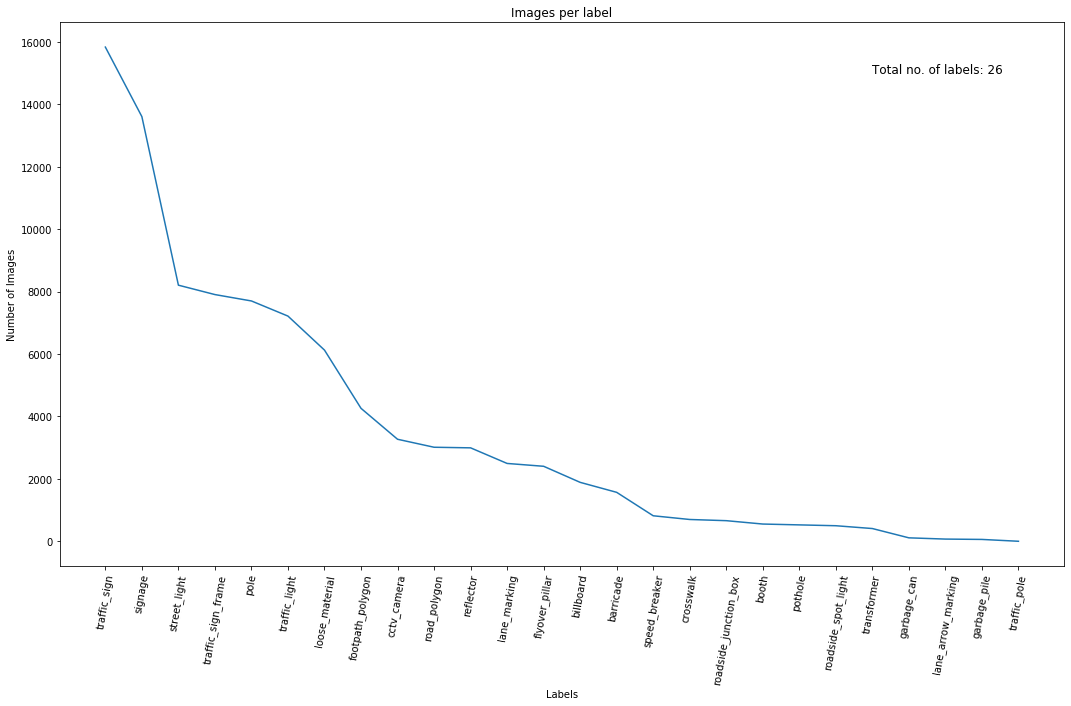

In [23]:
lists = (sorted_img_per_label) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(18,10))
plt.xticks(rotation=80)
plt.title("Images per label")
plt.xlabel("Labels")
plt.ylabel("Number of Images")

po = len(list(img_per_label))

plt.plot(x, y)
plt.text(x=21, y=15000, s="Total no. of labels: {}".format(po), size=12)
plt.show()

In [24]:
img_per_label_df = pd.DataFrame(list(img_per_label.items()))
img_per_label_df.columns = ["Label", "Images"]
img_per_label_df.sort_values('Images', ascending=False, inplace=True)
img_per_label_df.head()

,Label,Images
3,traffic_sign,15838
9,signage,13609
10,street_light,8208
1,traffic_sign_frame,7907
7,pole,7702


In [25]:
#Uncomment next line to export csv file of img_per_label_df dataframe
#img_per_label_df.to_csv('image_per_label.csv')

In [26]:
for i,j in enumerate(sorted_img_per_label):
    print(i, j[0], j[1])

0 traffic_sign 15838
1 signage 13609
2 street_light 8208
3 traffic_sign_frame 7907
4 pole 7702
5 traffic_light 7217
6 loose_material 6127
7 footpath_polygon 4261
8 cctv_camera 3270
9 road_polygon 3014
10 reflector 2995
11 lane_marking 2495
12 flyover_pillar 2404
13 billboard 1889
14 barricade 1569
15 speed_breaker 818
16 crosswalk 699
17 roadside_junction_box 661
18 booth 553
19 pothole 526
20 roadside_spot_light 499
21 transformer 409
22 garbage_can 111
23 lane_arrow_marking 71
24 garbage_pile 60
25 traffic_pole 1


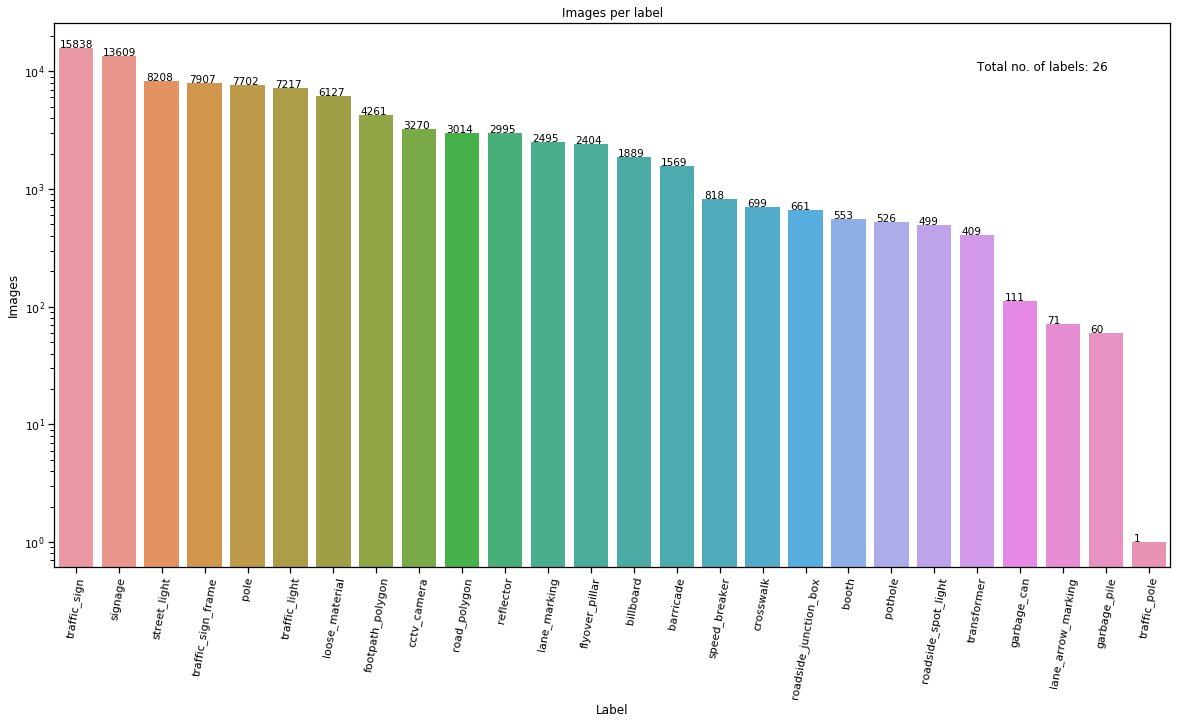

In [27]:
sns.set(style=None, color_codes=True)
plt.figure(figsize=(20,10))
axes = sns.barplot(x='Label', y = 'Images', data =img_per_label_df)
plt.yscale("log")
#plt.autoscale(enable=True, axis='y', tight=True)
plt.xticks(rotation=80)

for i, j in enumerate(sorted_img_per_label):
    plt.text(x = i-0.361 , y = j[1], s = j[1], size=10.5)

ko = len(sorted_img_per_label)
    
plt.text(x=21, y=10000, s="Total no. of labels: {}".format(ko), size = 12)
    
plt.title("Images per label")
#plt.bar(x, y)
plt.show()

In [28]:
annot_label = {}
for i in range(len(df)):
    for j in range(len(df.label[i])):
        if df.label[i][j] in annot_label.keys():
            annot_label[df.label[i][j]] = annot_label[df.label[i][j]] + df.annotation_per_label[i][j]
        else:
            annot_label[df.label[i][j]] = df.annotation_per_label[i][j]

In [29]:
sorted_annot_label = sorted(annot_label.items(), reverse=True, key=operator.itemgetter(1))

sorted_annot_label

[('street_light', 31839),
 ('pole', 25245),
 ('traffic_sign', 25189),
 ('signage', 24707),
 ('traffic_light', 19388),
 ('traffic_sign_frame', 14983),
 ('flyover_pillar', 11440),
 ('reflector', 10693),
 ('loose_material', 9831),
 ('lane_marking', 7181),
 ('footpath_polygon', 5716),
 ('road_polygon', 5381),
 ('billboard', 4635),
 ('cctv_camera', 4469),
 ('barricade', 2157),
 ('speed_breaker', 918),
 ('crosswalk', 847),
 ('roadside_junction_box', 791),
 ('pothole', 723),
 ('roadside_spot_light', 591),
 ('booth', 555),
 ('transformer', 467),
 ('garbage_can', 129),
 ('lane_arrow_marking', 87),
 ('garbage_pile', 60),
 ('traffic_pole', 2)]

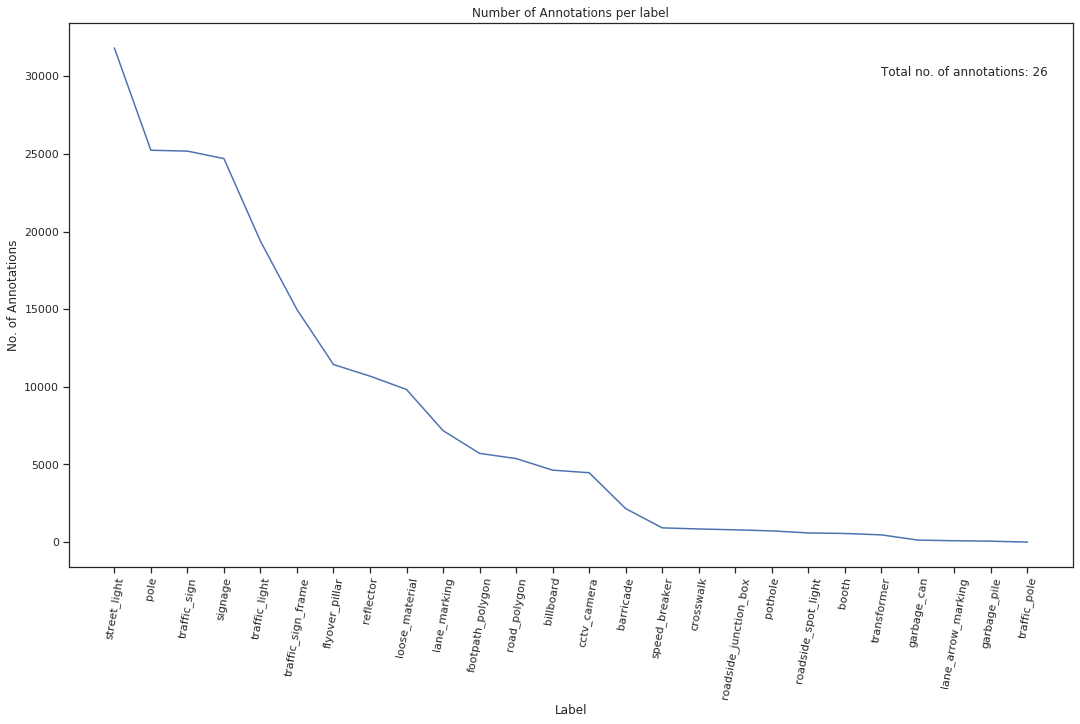

In [30]:
lists = (sorted_annot_label) # sorted by key, return a list of tuples
sns.set(style="ticks")
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(18,10))
plt.xticks(rotation=80)
plt.xlabel("Label")
plt.ylabel("No. of Annotations")
plt.plot(x, y)
plt.title("Number of Annotations per label")
po = len(list(sorted_annot_label))
plt.text(x=21, y=30000, s="Total no. of annotations: {}".format(po), size=12)
plt.show()

In [31]:
annot_label_df = pd.DataFrame(list(annot_label.items()))
annot_label_df.columns = ['Label', 'Annotations']
annot_label_df.sort_values('Annotations', ascending=False, inplace=True)
annot_label_df.head()

,Label,Annotations
10,street_light,31839
7,pole,25245
3,traffic_sign,25189
9,signage,24707
11,traffic_light,19388


In [32]:
#Uncomment next line to export csv file of annot_label_df dataframe
#annot_label_df.to_csv('annotations_per_label.csv')

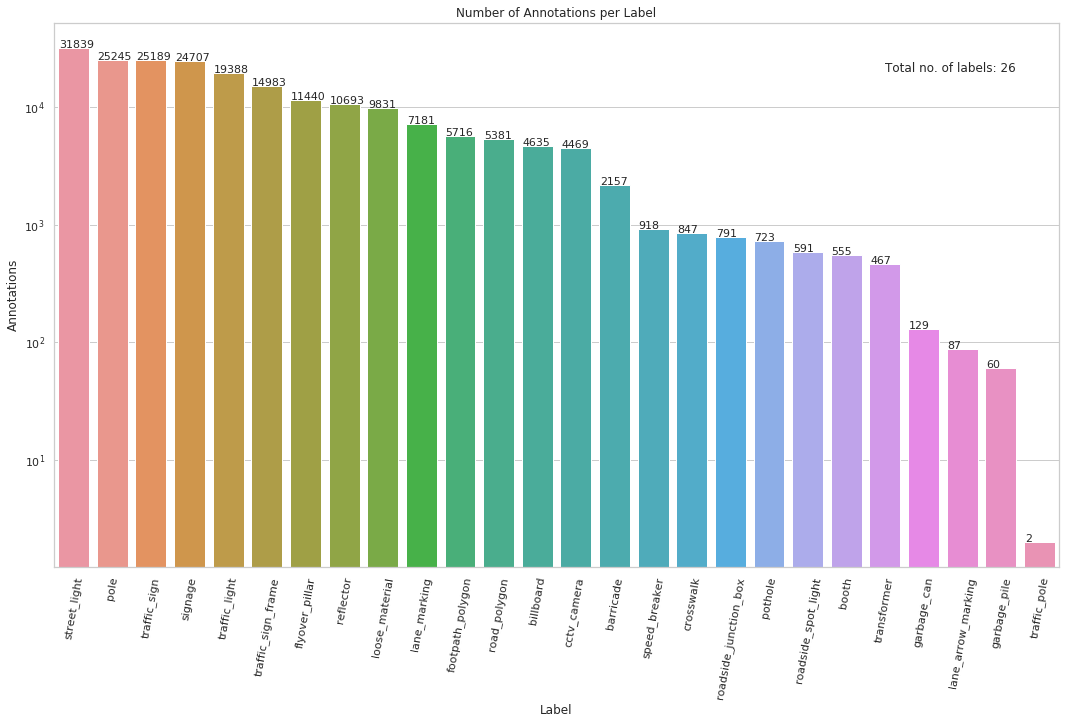

In [33]:
sns.set(style='whitegrid', color_codes=True)
plt.figure(figsize=(18,10))
sns.barplot(x='Label', y = 'Annotations', data =annot_label_df)
plt.yscale("log")
#plt.autoscale(enable=True, axis='y', tight=True)
plt.xticks(rotation=80)
plt.title("Number of Annotations per Label")

for i, j in enumerate(sorted_annot_label):
    plt.text(x = i-0.38 , y = j[1], s = j[1], size=11)

lo = len(sorted_annot_label)

plt.text(x= 21, y=20000, s="Total no. of labels: {}".format(lo), size=12)

#plt.bar(x, y)
plt.show()

In [34]:
# plt.figure(figsize=(18,10))
# sns.barplot(x='Label', y = 'Annotations', data =annot_label_df)
# plt.yscale("log")
# #plt.autoscale(enable=True, axis='y', tight=True)
# plt.xticks(rotation=80)
# plt.title("Number of Annotations per Label")

# for i, j in enumerate(sorted_annot_label):
#     plt.text(x = i-0.38 , y = j[1], s = j[1], size=11)

# lo = len(sorted_annot_label)

# plt.text(x= 21, y=20000, s="Total no. of labels: {}".format(lo), size=12)

# #plt.bar(x, y)
# plt.show()

In [38]:
data_df = img_per_label_df.copy()

In [40]:
data_df['Annotations'] = annot_label_df['Annotations']

In [41]:
data_df

,Label,Images,Annotations
3,traffic_sign,15838,25189
9,signage,13609,24707
10,street_light,8208,31839
1,traffic_sign_frame,7907,14983
7,pole,7702,25245
11,traffic_light,7217,19388
0,loose_material,6127,9831
2,footpath_polygon,4261,5716
4,cctv_camera,3270,4469
6,road_polygon,3014,5381


In [48]:
plot_df = pd.melt(data_df, id_vars='Label', var_name='Legend', value_name='Total_Number')

In [49]:
plot_df

,Label,Legend,Total_Number
0,traffic_sign,Images,15838
1,signage,Images,13609
2,street_light,Images,8208
3,traffic_sign_frame,Images,7907
4,pole,Images,7702
5,traffic_light,Images,7217
6,loose_material,Images,6127
7,footpath_polygon,Images,4261
8,cctv_camera,Images,3270
9,road_polygon,Images,3014


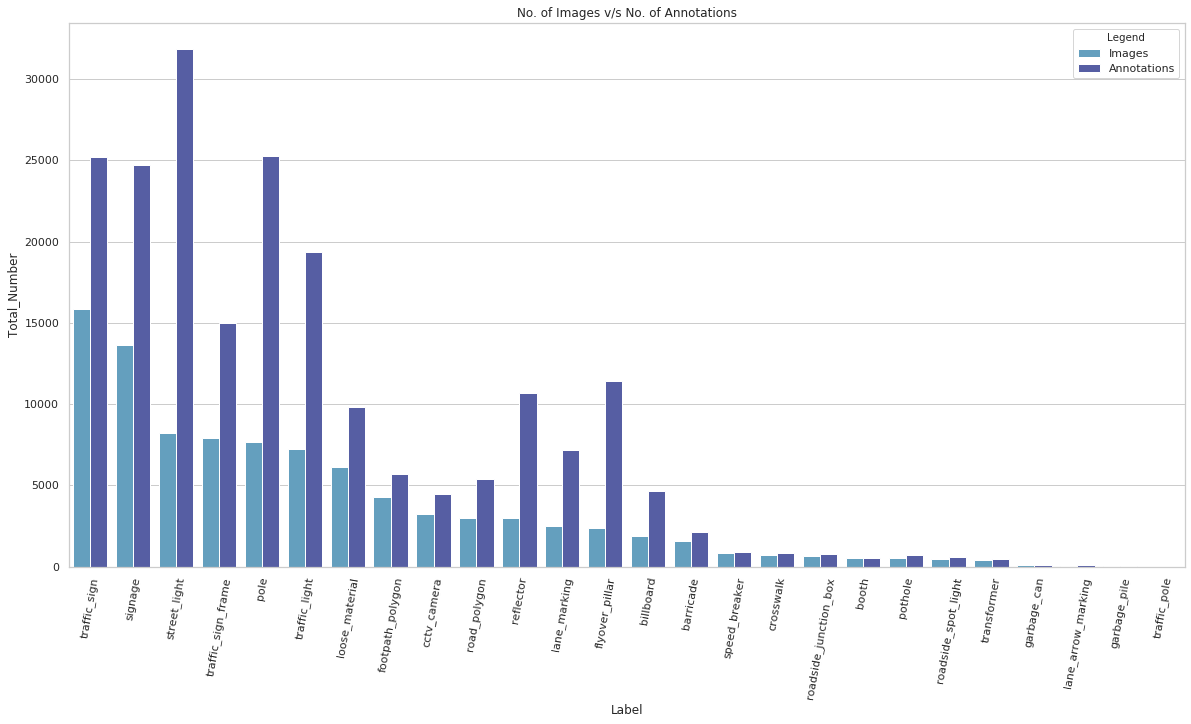

In [55]:
sns.set(style='whitegrid')
sns.set_palette("icefire")
plt.figure(figsize=(20,10))
sns.barplot(x='Label', y = 'Total_Number', hue='Legend', data =plot_df)
plt.xticks(rotation=80)
plt.title("No. of Images v/s No. of Annotations")
plt.show()